In [29]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import numpy as np
from scipy.interpolate import RegularGridInterpolator

from darkmod import laue
from darkmod.distribution import (
    Kent,
    MultivariateNormal,
    MultivariateTruncatedNormal,
    Normal,
)
from darkmod.transforms import Q_to_lab, lab_to_Q

from dfxm import experiment

from darkmod import resolution

fontsize = 22
ticksize= 22
plt.style.use('dark_background')
plt.rcParams['font.size'] = fontsize
plt.rcParams['xtick.labelsize'] = ticksize
plt.rcParams['ytick.labelsize'] = ticksize
plt.rcParams['font.family'] = 'Times New Roman'

In [30]:
U = np.eye(3, 3)
a = b = c = 4.0493
unit_cell = [a, b, c, 90.0, 90.0, 90.0]
lambda_0 = 0.71
energy_0 = laue.angstrom_to_keV(lambda_0)
sigma_e = (1.4 * 1e-4) / (2 * np.sqrt(2 * np.log(2)))
hkl = np.array([0, 0, 2])


In [31]:
goni = experiment.Goniometer(U, unit_cell, energy_0)
goni.bring_to_bragg(hkl)
Q0 = goni.U @ goni.B @ hkl
d_0 = (2 * np.pi) / np.linalg.norm(Q0)
theta_0 = np.arcsin(lambda_0 / (2 * d_0))
k_0 = 2 * np.pi / lambda_0


In [32]:
desired_FWHM_N = 0.53 * 1e-3
epsilon = np.random.normal(0, sigma_e, size=(20000,))
random_energy = energy_0 + epsilon * energy_0
sigma_lambda = laue.keV_to_angstrom(random_energy).std()
mu_lambda = lambda_0
desired_FWHM_C = 0.731 * 1e-3

In [33]:
res1 = resolution.PentaGauss(
    goni.optical_axis,
    desired_FWHM_N / (2 * np.sqrt(2 * np.log(2))),
    desired_FWHM_N / (2 * np.sqrt(2 * np.log(2))),
    desired_FWHM_C / (2 * np.sqrt(2 * np.log(2))),
    desired_FWHM_C / (2 * np.sqrt(2 * np.log(2))),
    mu_lambda,
    sigma_lambda,
)

res1.compile()

In [49]:
Q = res1.sample(2000)
dQ_orig = Q - Q0[:, None]

In [ ]:
d = (2*np.pi) / np.linalg.norm(Q, axis=0)
theta = np.arcsin()

(array([2.02324313, 2.02551538, 2.02199527, ..., 2.02276403, 2.02402119,
        2.02604547]),
 array([0, 0, 2]),
 2.0246499999999994)

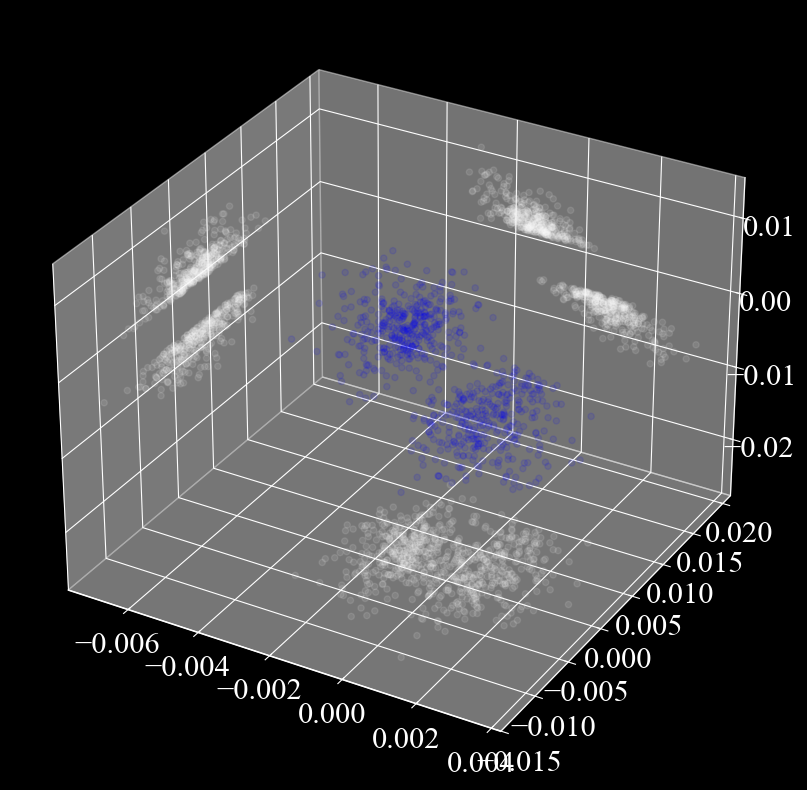

In [81]:
dQ = dQ_orig[:, np.abs(dQ_orig[2]) > 0.003]

fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d',)

# Main 3D scatter
ax.scatter(dQ[0], dQ[1], dQ[2], color='blue', alpha=0.1)

# Cartesian projections
ax.scatter(dQ[0], dQ[1], -2*np.ones_like(dQ[2])*np.max(dQ[2]), color='w', alpha=0.1)
ax.scatter(dQ[0], 2*np.ones_like(dQ[1])*np.max(dQ[1]), dQ[2], color='w', alpha=0.1)
ax.scatter(-2*np.ones_like(dQ[0])*np.max(dQ[0]), dQ[1], dQ[2], color='w', alpha=0.1)

plt.show()

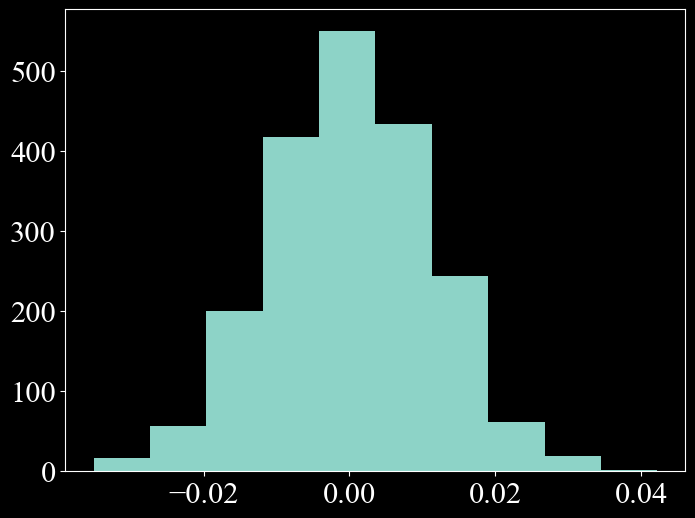

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.hist(theta - np.degrees(theta_0))
plt.show()

In [78]:
theta_0

0.17625003864639419

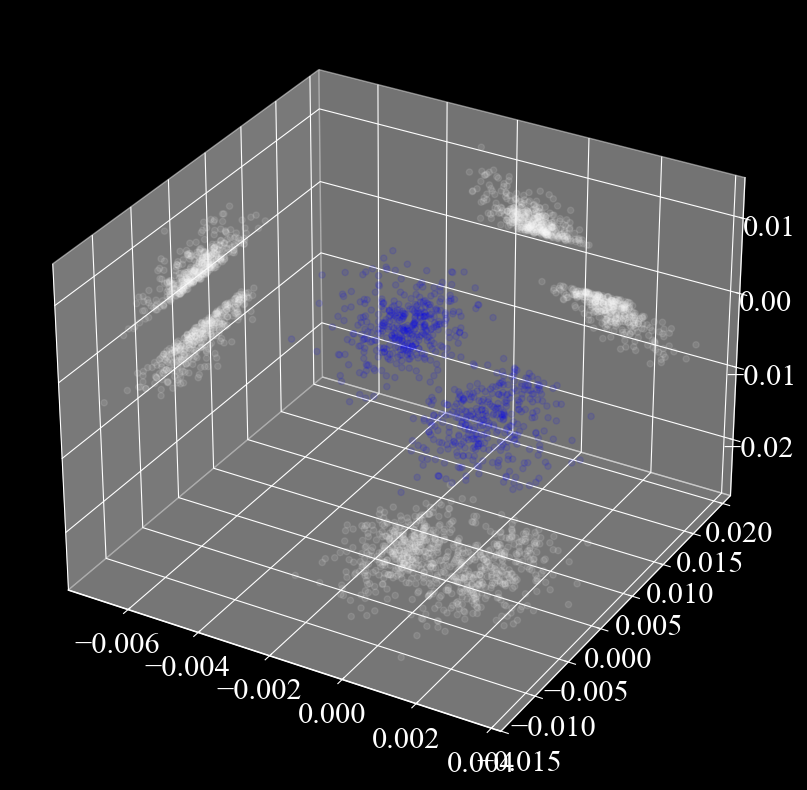

In [80]:
d = (2*np.pi) / np.linalg.norm(Q, axis=0)
theta = np.degrees( np.arcsin(lambda_0 / (2 * d)) )
mask = np.abs(theta - np.degrees(theta_0)) > 0.01

dQ = dQ_orig[:, mask]

fig = plt.figure( figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d',)

# Main 3D scatter
ax.scatter(dQ[0], dQ[1], dQ[2], color='blue', alpha=0.1)

# Cartesian projections
ax.scatter(dQ[0], dQ[1], -2*np.ones_like(dQ[2])*np.max(dQ[2]), color='w', alpha=0.1)
ax.scatter(dQ[0], 2*np.ones_like(dQ[1])*np.max(dQ[1]), dQ[2], color='w', alpha=0.1)
ax.scatter(-2*np.ones_like(dQ[0])*np.max(dQ[0]), dQ[1], dQ[2], color='w', alpha=0.1)

plt.show()

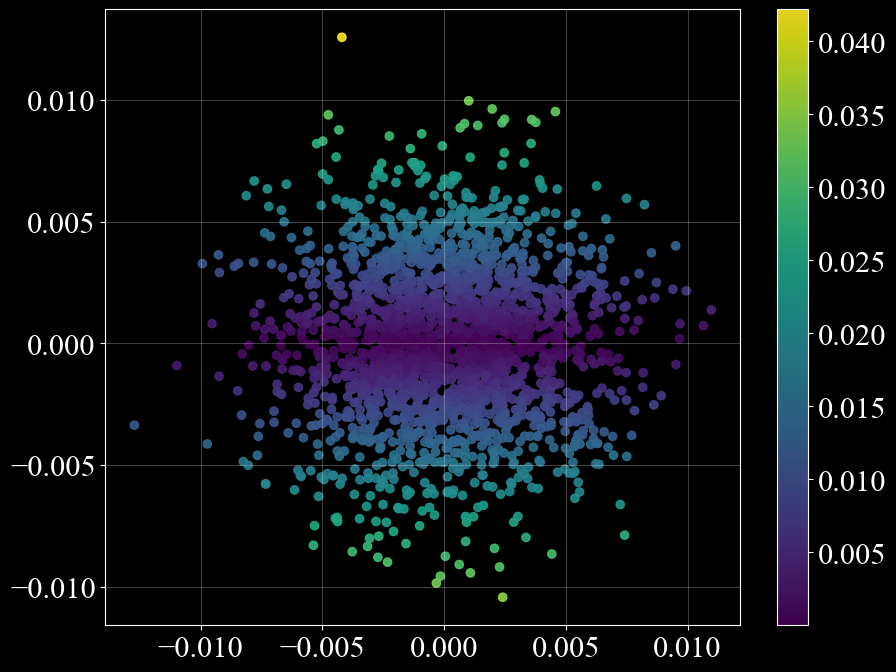

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
im =  ax.scatter(dQ_orig[1], dQ_orig[2], alpha=0.9, c=np.abs(theta-np.degrees(theta_0)))

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

ax.grid(True, alpha=0.25)
ax.set_aspect('equal')
plt.show()

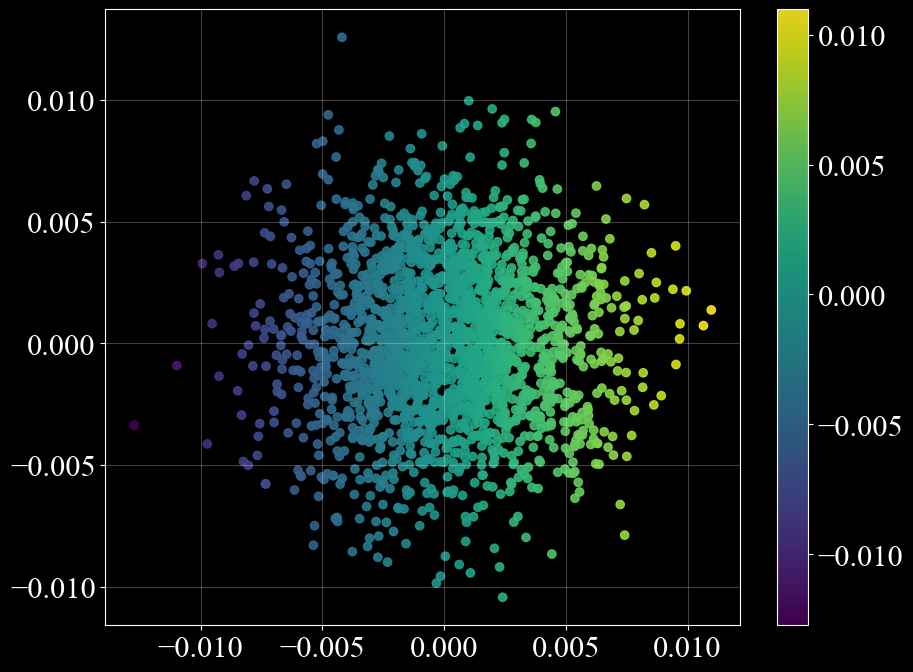

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
im =  ax.scatter(dQ_orig[1], dQ_orig[2], alpha=0.9, c=dQ_orig[1])

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

ax.grid(True, alpha=0.25)
ax.set_aspect('equal')
plt.show()

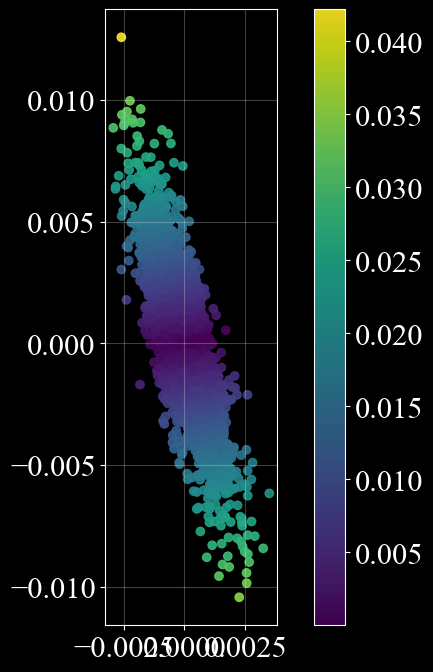

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
im =  ax.scatter(dQ_orig[0], dQ_orig[2], alpha=0.9, c=np.abs(theta-np.degrees(theta_0)))

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

ax.grid(True, alpha=0.25)
ax.set_aspect('equal')
plt.show()

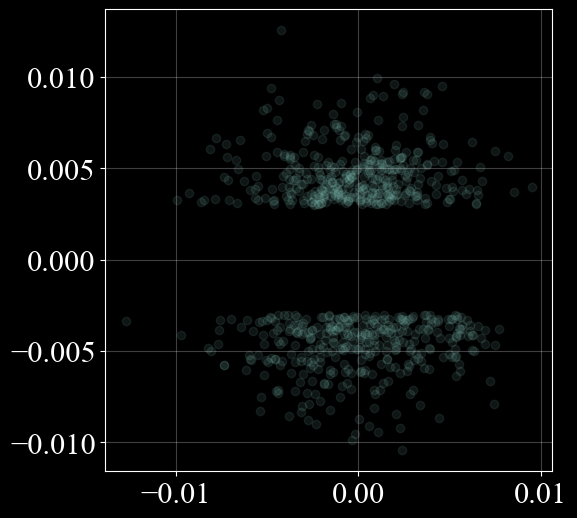

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(dQ[1], dQ[2], alpha=0.1)
ax.grid(True, alpha=0.25)
ax.set_aspect('equal')
plt.show()